Path Finder for connected and independent q-incomplete graph partitinos

In [281]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import more_itertools

In [282]:
n = 7
k = 4
G = nx.cycle_graph(n)

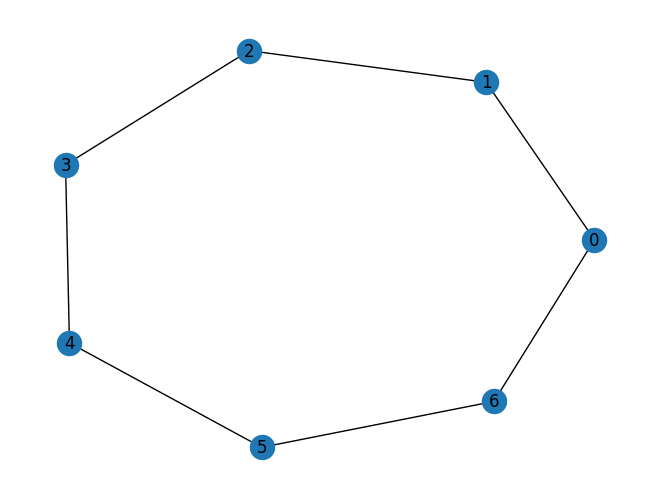

In [283]:
nx.draw(G, labels={i: i for i in G.nodes()})

In [284]:
vertices = tuple(range(n))
print (vertices)

s1 = more_itertools.set_partitions(vertices, k)
for p in s1:
    print (p)

(0, 1, 2, 3, 4, 5, 6)
[[0], [1], [2], [3, 4, 5, 6]]
[[0], [1], [2, 3], [4, 5, 6]]
[[0], [1], [3], [2, 4, 5, 6]]
[[0], [1], [2, 3, 4], [5, 6]]
[[0], [1], [3, 4], [2, 5, 6]]
[[0], [1], [2, 4], [3, 5, 6]]
[[0], [1], [4], [2, 3, 5, 6]]
[[0], [1], [2, 3, 4, 5], [6]]
[[0], [1], [3, 4, 5], [2, 6]]
[[0], [1], [2, 4, 5], [3, 6]]
[[0], [1], [4, 5], [2, 3, 6]]
[[0], [1], [2, 3, 5], [4, 6]]
[[0], [1], [3, 5], [2, 4, 6]]
[[0], [1], [2, 5], [3, 4, 6]]
[[0], [1], [5], [2, 3, 4, 6]]
[[0], [1, 2], [3], [4, 5, 6]]
[[0], [2], [1, 3], [4, 5, 6]]
[[0], [2], [3], [1, 4, 5, 6]]
[[0], [1, 2], [3, 4], [5, 6]]
[[0], [2], [1, 3, 4], [5, 6]]
[[0], [2], [3, 4], [1, 5, 6]]
[[0], [1, 2], [4], [3, 5, 6]]
[[0], [2], [1, 4], [3, 5, 6]]
[[0], [2], [4], [1, 3, 5, 6]]
[[0], [1, 2], [3, 4, 5], [6]]
[[0], [2], [1, 3, 4, 5], [6]]
[[0], [2], [3, 4, 5], [1, 6]]
[[0], [1, 2], [4, 5], [3, 6]]
[[0], [2], [1, 4, 5], [3, 6]]
[[0], [2], [4, 5], [1, 3, 6]]
[[0], [1, 2], [3, 5], [4, 6]]
[[0], [2], [1, 3, 5], [4, 6]]
[[0], [2], [3, 5],

In [285]:
def is_connected(G, partition):
    for block in partition:
        if not nx.is_connected(G.subgraph(block)):
            return False
    return True

def is_q_complete(G, partition,):
    Q = nx.quotient_graph(G, partition)
    n = len(Q.nodes)
    return Q.number_of_edges() == n * (n - 1) / 2

def is_independent(G, partition):
    for block in partition:
        if not nx.is_empty(G.subgraph(block)):
            return False
    return True

In [286]:
def get_num_interior_edges(G, partition):
    return sum(G.subgraph(block).number_of_edges() for block in partition)

def get_num_exterior_edges(G, partition):
    return G.number_of_edges() - get_num_interior_edges(G, partition)

In [287]:
def render_graph(G, partition):
    
    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'black']
    color_map = [0] * G.number_of_nodes()
    # set the colors
    for i, block in enumerate(partition):
        for v in block:
            color_map[v] = colors[i]
            
    nx.draw(G, labels={i: i for i in G.nodes()}, node_color=color_map)
    plt.show()
    plt.close()

In [288]:
s1 = more_itertools.set_partitions(vertices, k)
s1 = [[set(p) for p in part] for part in s1]
# s1 = [[set(p) for p in part] for part in s1 if is_connected(G, part)]
part_props = []
for e, partition in enumerate(s1):
    
    props = dict()
    props['is_connected'] = is_connected(G, partition)
    props['is_q_complete'] = is_q_complete(G, partition)
    props['is_independent'] = is_independent(G, partition)
    print (partition, props)
    part_props.append(props)
    # render_graph(G, partition)
    

[{0}, {1}, {2}, {3, 4, 5, 6}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {2, 3}, {4, 5, 6}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {3}, {2, 4, 5, 6}] {'is_connected': False, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {2, 3, 4}, {5, 6}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {3, 4}, {2, 5, 6}] {'is_connected': False, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {2, 4}, {3, 5, 6}] {'is_connected': False, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {4}, {2, 3, 5, 6}] {'is_connected': False, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {2, 3, 4, 5}, {6}] {'is_connected': True, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {3, 4, 5}, {2, 6}] {'is_connected': False, 'is_q_complete': False, 'is_independent': False}
[{0}, {1}, {2, 4, 5}, {3, 6}] {'is_connected': False, 'is_q_complete': False,

In [289]:
def can_transform_by_one_move(p1, p2):
    """
    Check if partition p1 can be transformed into p2 by moving one element.
    
    Args:
        p1: List of sets representing the first partition
        p2: List of sets representing the second partition
        
    Returns:
        bool: True if transformation is possible with one move
    """
    # Check if the number of blocks is the same
    if len(p1) != len(p2):
        return False
    
    
    for ba, bb in zip(p1, p2):
        
        # If the blocks are the same, move to the next pair
        if ba == bb:
            continue
        
        # check if one block is a subset of the other (this is required)
        if ba.issubset(bb) or bb.issubset(ba):
            continue
        
        # check if the symmetric difference of the two blocks is a single element
        if len(ba.symmetric_difference(bb)) == 1:
            continue
        
        # If none of the conditions are met, return False
        return False
    
    # if all blocks are equal now, we need to return false
    all_equal = all(ba == bb for ba, bb in zip(p1, p2))

    return not all_equal

# Example usage:
p1 = [{1, 2}, {3, 4}, {5, 6}]
p2 = [{1, 2}, {3, 4, 5}, {6}]
print(can_transform_by_one_move(p1, p2))  # True

p1 = [{1, 2}, {3, 4}, {5, 6}]
p2 = [{1, 2, 3}, {4}, {5, 6}]
print(can_transform_by_one_move(p1, p2))  # True

p1 = [{1, 2}, {3, 4}, {5, 6}]
p2 = [{1, 2, 3}, {4, 5}, {6}]
print(can_transform_by_one_move(p1, p2))  # False (requires two moves)


True
True
False


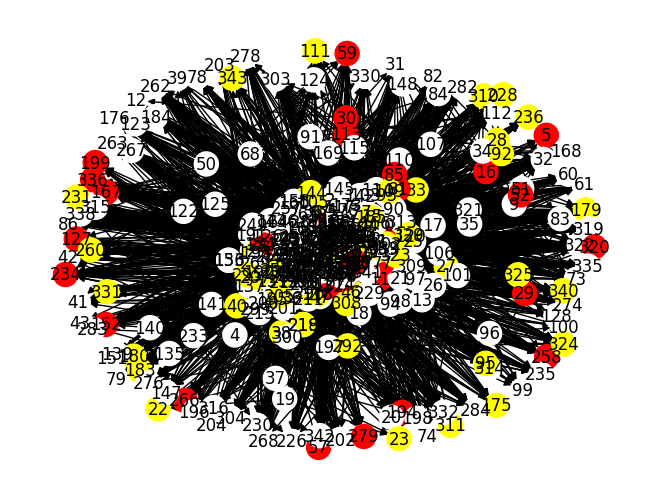

In [290]:
# let's create a graph that represents all connected partitions with an edge between them if 
# they can be transformed by one move

Gr = nx.DiGraph()
for e1, p1 in enumerate(s1):
    for e2, p2 in enumerate(s1):
        if can_transform_by_one_move(p1, p2):
            if get_num_interior_edges(G, p1) > get_num_interior_edges(G, p2):
                Gr.add_edge(e1, e2)

colors = []
for i, p in enumerate(s1):
    
    if part_props[i]['is_connected']:
        
        if i in Gr:
            Gr.nodes[i]['type'] = 1
            colors.append('red')
    elif part_props[i]['is_independent']:
      
        if part_props[i]['is_q_complete']:
            if i in Gr:
                Gr.nodes[i]['type'] = 0
                colors.append('green')
        else:
            if i in Gr:
                Gr.nodes[i]['type'] = 3
                colors.append('yellow')
    elif part_props[i]['is_q_complete']:
        if i in Gr:
            Gr.nodes[i]['type'] = 2
            colors.append('purple')
    else:
        if i in Gr:
            Gr.nodes[i]['type'] = 2
            if part_props[i]['is_q_complete']:
                colors.append('gray')
            else:
                colors.append('white')                
nx.draw(Gr, with_labels=True, node_color=colors)

In [291]:
def find_path_between_types(G, start_type, end_type):
    # Find all nodes of the start and end types
    start_nodes = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == start_type]
    end_nodes = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == end_type]
    
    print ('start_nodes', start_nodes)
    print ('end_nodes', end_nodes)
    
    paths = []
    
    # Try each combination of start and end nodes
    for start_node in start_nodes:
        for end_node in end_nodes:
            try:
                # Find shortest path between these nodes
                path = nx.shortest_path(G, start_node, end_node)
                paths.append(path)
            except nx.NetworkXNoPath:
                continue
    
    return paths  


In [292]:
path = find_path_between_types(Gr, 1, 3)

print (path)
print ()
print ('Number of paths found:', len(path))

start_nodes [0, 1, 3, 7, 15, 18, 24, 36, 45, 63, 90, 93, 94, 97, 102, 105, 118, 121, 130, 133, 154, 157, 190, 193, 205, 206, 209, 221, 238, 241, 253, 286, 289, 301, 349]
end_nodes [57, 84, 322, 12, 78, 258, 60, 226, 274, 338, 31, 73, 32, 74, 82, 83, 310, 314, 234, 61, 230, 59, 79, 86, 262, 266, 278, 282, 330, 342, 111, 112, 167, 168, 179, 303, 180, 304, 151, 152, 147, 148, 176, 184, 175, 183, 319, 320, 335, 336, 235, 228, 236, 231, 268, 284, 263, 267, 279, 283, 260, 276, 311, 315, 316, 324, 331, 332, 340, 343]
[[0, 57], [0, 84], [0, 322], [0, 11, 12], [0, 75, 78], [0, 11, 258], [0, 11, 60], [0, 11, 226], [0, 9, 274], [0, 66, 338], [0, 48, 234], [0, 48, 59], [0, 66, 86], [0, 75, 266], [0, 66, 282], [0, 66, 330], [1, 11, 57], [1, 75, 84], [1, 11, 322], [1, 2, 12], [1, 2, 78], [1, 2, 258], [1, 11, 60], [1, 11, 226], [1, 75, 274], [1, 75, 338], [1, 2, 30, 31], [1, 2, 72, 73], [1, 2, 30, 32], [1, 2, 72, 74], [1, 2, 72, 83], [1, 2, 72, 314], [1, 2, 72, 79], [1, 75, 86], [1, 2, 72, 262], [1, 